<IPython.core.display.Javascript object>


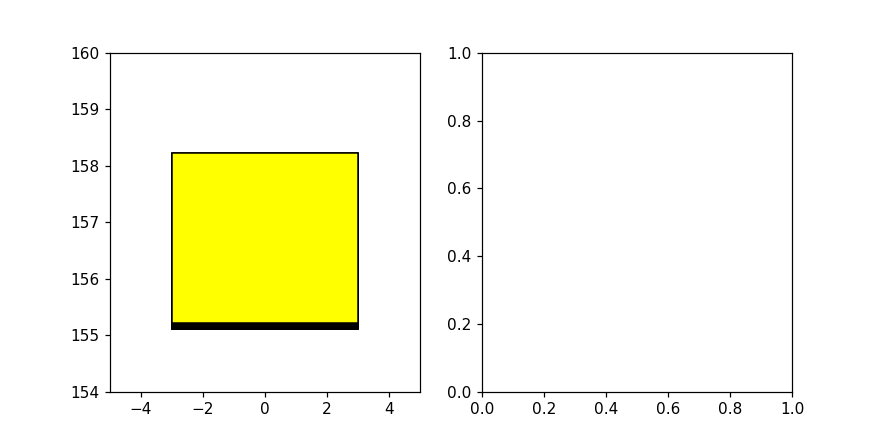

In [27]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation
from matplotlib import patches as pat
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

bl_width = 6
bl_Height = 3

#CSV読み込み
filename ='sample.csv'
df = pd.read_csv( filename, header=None )

col_name = ['Left_H','Right_H']
df.columns = col_name

#回転角
df['theta'] = np.arctan((df['Right_H'] - df['Left_H']) / bl_width)
df['theta_deg'] = np.degrees(df['theta'])

#左刃先X座標
df['LD_X'] = -(bl_width / 2)*np.cos( df['theta'])

#刃先高さの最大値、最小値
max_H = math.floor(max( df['Left_H'].max(), df['Right_H'].max() ))
min_H = math.floor(min( df['Left_H'].min(), df['Right_H'].min() ))

#図の描写
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlim(-bl_width/2 - 2, bl_width/2 + 2)
ax1.set_ylim( min_H - 1, max_H + 4 )

def ani_func(i):
    #ax1.cla()
    blade = pat.Rectangle( xy=( df.loc[i,['LD_X']],df.loc[i,['Left_H']] ),
                          width=bl_width,
                          height=bl_Height,
                          angle=df.loc[i,['theta_deg']],
                          facecolor="yellow",
                          edgecolor="black" )
    ax1.add_patch(blade)

#plt.xlim(-5,5)
#plt.ylim( min_H - bl_Height, max_H + bl_Height )
#plt.ylim( 150, 160 )

ani = animation.FuncAnimation(fig, ani_func, interval=10, frames=df.index[-1], repeat=False)
plt.show()

    


#print(df.index[-1])
#print(max_H)
#print(min_H)


#df.head()
#df[400:410]
#print(df.loc[0,['Left_H']])
#print(df.loc[1,['Left_H']])
#print(df.loc[2,['Left_H']])

In [126]:
df[400:410]

,Left_H,Right_H,theta,theta_deg,LD_X
400,156.10,155.1,-0.165149,-9.462322,-2.959182
401,156.09,155.1,-0.163527,-9.369385,-2.959978
402,156.09,155.1,-0.163527,-9.369385,-2.959978
403,156.08,155.1,-0.161904,-9.276398,-2.960767
404,156.08,155.1,-0.161904,-9.276398,-2.960767
405,156.07,155.1,-0.160280,-9.183362,-2.961548
406,156.07,155.1,-0.160280,-9.183362,-2.961548
407,156.06,155.1,-0.158655,-9.090277,-2.962322
408,156.06,155.1,-0.158655,-9.090277,-2.962322
409,156.05,155.1,-0.157030,-8.997143,-2.963088
